## Project 4 

### By: Jacob Swinton and Aaron Dzaboff

In [1]:
import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [3]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = train_labels
y_test = test_labels

## Project Code

In [6]:
#Creating a validation set
# training/validation split (validation size is 25%)
from sklearn.model_selection import train_test_split
x_train_, val_train, x_test_, val_labels = train_test_split(x_train,
        y_train, random_state = 4)

print('There are {} training samples, {} validation samples, and {} test samples.'
      .format(len(x_train), len(val_train), len(x_test)))

There are 25000 training samples, 6250 validation samples, and 25000 test samples.


In [7]:
# define network model
from keras import models
from keras import layers

network = models.Sequential()

#Input layer
network.add(layers.Dense(50, activation='relu', input_shape=(10000, )))

#Hidden Layers
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(50, activation='relu'))

#Outputlayer
network.add(layers.Dense(1, activation='sigmoid'))
network.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                500050    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Configuring the network

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
# training
history = network.fit(x_train_, x_test_, epochs=10, batch_size=32, validation_data = (val_train, val_labels))

Train on 18750 samples, validate on 6250 samples
Epoch 1/10
18750/18750 [==============================] - 8s 438us/step - loss: 5.5750e-04 - accuracy: 0.9998 - val_loss: 5.3160 - val_accuracy: 0.8634
Epoch 2/10
18750/18750 [==============================] - 8s 441us/step - loss: 6.7532e-04 - accuracy: 0.9999 - val_loss: 4.8598 - val_accuracy: 0.8642
Epoch 3/10
18750/18750 [==============================] - 9s 505us/step - loss: 8.6343e-09 - accuracy: 1.0000 - val_loss: 5.0496 - val_accuracy: 0.8688
Epoch 4/10
18750/18750 [==============================] - 9s 498us/step - loss: 7.6978e-10 - accuracy: 1.0000 - val_loss: 5.1713 - val_accuracy: 0.8696
Epoch 5/10
18750/18750 [==============================] - 9s 459us/step - loss: 3.6861e-10 - accuracy: 1.0000 - val_loss: 5.2479 - val_accuracy: 0.8707
Epoch 6/10
18750/18750 [==============================] - 9s 481us/step - loss: 2.4336e-10 - accuracy: 1.0000 - val_loss: 5.2968 - val_accuracy: 0.8704
Epoch 7/10
18750/18750 [===============

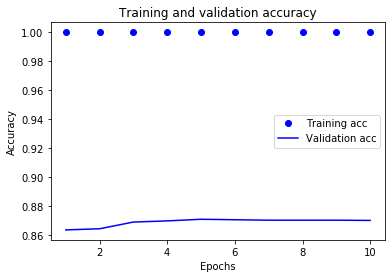

The best model is obtained right after 5 epochs


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# plot training score and validation score
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# best model
best_score = 0
best_epoch = 1
for c in range (1, len(acc)+1, 1):
    if val_acc[c-1] > best_score:
        best_epoch = c
        best_score = val_acc[c-1]

print("The best model is obtained right after {} epochs".format(best_epoch))

In [28]:
# train the model
network.fit(x_train, y_train, epochs=best_epoch, batch_size=32)

Epoch 1/5
25000/25000 [==============================] - 11s 434us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 2/5
25000/25000 [==============================] - 10s 395us/step - loss: 0.0047 - accuracy: 0.9993
Epoch 3/5
25000/25000 [==============================] - 10s 420us/step - loss: 0.0018 - accuracy: 0.9998
Epoch 4/5
25000/25000 [==============================] - 11s 434us/step - loss: 2.5284e-04 - accuracy: 0.9999
Epoch 5/5
25000/25000 [==============================] - 10s 410us/step - loss: 5.1041e-06 - accuracy: 1.0000


In [29]:
# Evaluation
test_loss, test_acc = network.evaluate(x_test, y_test)
print('The test score is {:.2f}%'.format(test_acc*100))

25000/25000 [==============================] - 5s 216us/step
The test score is 86.15%
